In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time
import urllib.request

%matplotlib inline

In [15]:
def readinput(url):
    qap_instance_file = urllib.request.urlopen(url)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    print('Problem size: %d' % n)

    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    #print('Flow matrix:\n', A)

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    #print('Distance matrix:\n', B)
    
    return n, A, B

In [30]:
def qap_objective_function(p, n, A, B):
    s = 0.0
    for i in range(n):
        s += (A[i, :] * B[p[i], p]).sum()
    return s

def random_neighbor(p, radius, n):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [34]:
def sa(n, A, B, T, radius, alpha):
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, n, A, B)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius, n)
        q_cost = qap_objective_function(q, n, A, B)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    print(time.time() - t0, costs.min())
    
    return costs

In [35]:
n12, A12, B12 = readinput('https://coral.ise.lehigh.edu/wp-content/uploads/2014/07/data.d/nug12.dat')
n16a, A16a, B16a = readinput('https://coral.ise.lehigh.edu/wp-content/uploads/2014/07/data.d/nug16a.dat')
n18, A18, B18 = readinput('https://coral.ise.lehigh.edu/wp-content/uploads/2014/07/data.d/nug18.dat')
n24, A24, B24 = readinput('https://coral.ise.lehigh.edu/wp-content/uploads/2014/07/data.d/nug24.dat')

Problem size: 12
Problem size: 16
Problem size: 18
Problem size: 24


5.621338367462158 578.0
costs qap12:


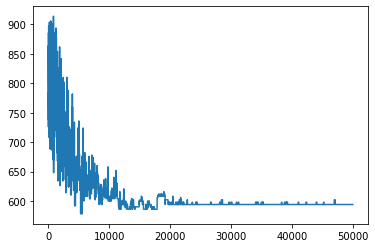

6.760917663574219 1610.0
costs qap16a:


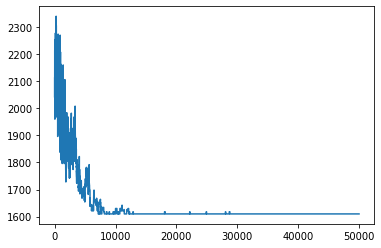

In [40]:
costs12 = sa(n12, A12, B12, 50000, 1, 1.0)
print( 'costs qap12:' )
plt.figure()
plt.plot(costs12)
plt.show()

costs16a = sa(n16a, A16a, B16a, 50000, 1, 1.0)
print( 'costs qap16a:' )
plt.figure()
plt.plot(costs16a)
plt.show()

37.16753101348877 1968.0
costs qap18:


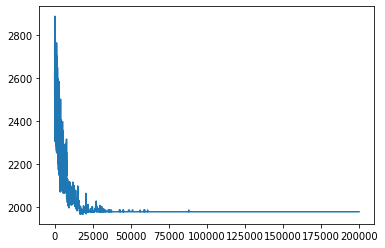

In [64]:
costs18 = sa(n18, A18, B18, 200000, 1, 1.8)
print( 'costs qap18:' )
plt.figure()
plt.plot(costs18)
plt.show()

64.36920952796936 3512.0
costs qap24:


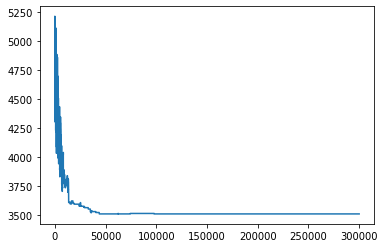

In [76]:
costs24 = sa(n24, A24, B24, 300000, 2, 2.0)
print( 'costs qap24:' )
plt.figure()
plt.plot(costs24)
plt.show()

In [62]:
def sawithsuccess(n, A, B, T, radius, alpha):
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, n, A, B)
    costs = np.zeros(T)
    successes = np.zeros(T)
    acclosses = np.zeros(T)
    s = 0
    a = 0
    for t in range(T):
        q = random_neighbor(p, radius, n)
        q_cost = qap_objective_function(q, n, A, B)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
            s += 1
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
            a += 1
        costs[t] = p_cost
        successes[t] = s
        acclosses[t] = a

    print(time.time() - t0, costs.min())
    
    return costs, successes, acclosses

In [69]:
costs18, successes18, acclosses18 = sawithsuccess(n18, A18, B18, 200000, 1, 1.8)

35.74345922470093 1978.0


costs qap18:


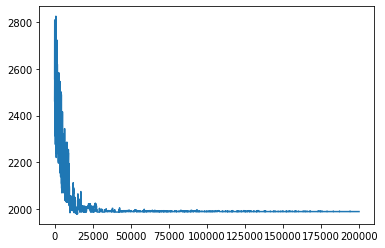

/home/szymon/.local/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


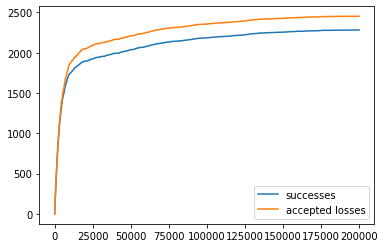

In [72]:
print( 'costs qap18:' )
plt.figure()
plt.plot(costs18)
plt.show()

plt.figure()
plt.plot(successes18, label='successes')
plt.plot(acclosses18, label='accepted losses')
plt.legend()
plt.show()

In [93]:
def permutationdistance( a, b ):
    dist = 0
    for i in range(len(a)):
        if a[i] != b[i]:
            dist += 1
    return dist

def sadiff(n, A, B, T, radius, alpha):
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, n, A, B)
    costs = np.zeros(T)
    diffpq = np.zeros(T)
    diffcost = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius, n)
        q_cost = qap_objective_function(q, n, A, B)
        
        if(q_cost < p_cost):
            diffcost[t] = p_cost - q_cost
            diffpq[t] = permutationdistance(p, q)
            
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    print(time.time() - t0, costs.min())
    
    return costs, diffpq, diffcost

In [94]:
costs18, diffpq18, diffcost18 = sadiff(n18, A18, B18, 100000, 1, 1.8)

18.412347078323364 1948.0


costs qap18:


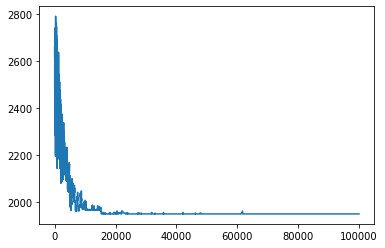

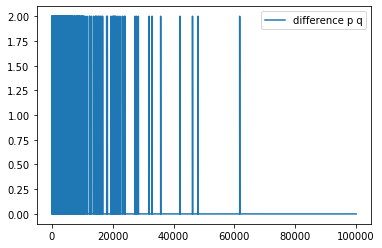

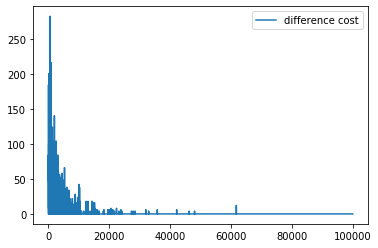

/home/szymon/.local/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


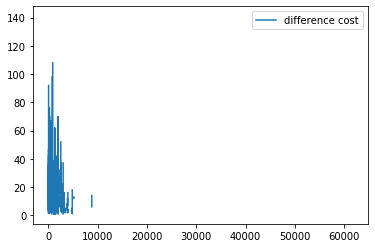

In [97]:
print( 'costs qap18:' )
plt.figure()
plt.plot(costs18)
plt.show()

plt.figure()
plt.plot(diffpq18, label='difference p q')
plt.legend()
plt.show()

plt.figure()
plt.plot(diffcost18, label='difference cost')
plt.legend()
plt.show()

In [113]:
def sav2(n, A, B, T, radius, alpha):
    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = qap_objective_function(p, n, A, B)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius, n)
        q_cost = qap_objective_function(q, n, A, B)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(-(q_cost - p_cost) / (alpha * (1.0 - t/T)))):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    print(time.time() - t0, costs.min())
    
    return costs

36.860347509384155 1930.0
costs qap18:


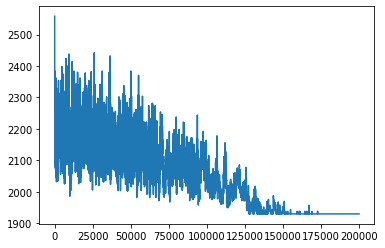

In [119]:
costs18 = sav2(n18, A18, B18, 200000, 1, 20.0)
print( 'costs qap18:' )
plt.figure()
plt.plot(costs18)
plt.show()

Udało się jak widać osiągnąć OPT.